# Filtering

# Li Kailang FDQAOR

Due No Due Date Points 0 Submitting a file upload File Types py and ipynb
Download scene 5 (Links to an external site.)

Implement Voxel grid down-sampling algorithm:
Voxelization Construct a Voxel container (each Voxel should contain a set of points from the point cloud)
Sample one point from each voxel using the average of all the points in that specific Voxel

Implement the Farthest Point Sampling algorithm:

Implement Normal Space sampling:
Estimate the point normals from the Point Cloud using the  open3D library:
pcd_obj = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(Your_Point_Cloud_Array))
pcd_obj.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
Access the points of pcd_boj using np.array(pcd_obj.points) and normals using np.array(pcd_obj.normals)
Use the point normals to scatter the points into a list of buckets each bucket contains a set of points
Sample  a point from each bucket

Implement Radius noise removal
Surface Sampling:

Implement Mesh down sampling:

Download the ModelNet10 3D mesh models from ModelNet10 (Links to an external site.)

Read the vertices and faces using read_off.py

calculate the triangle areas using the faces and the vertices (hint: every face represents an area and face contains indices to corresponding vertices)

randomly sample 2048 faces using the random.choices:
random.choices(faces,  weights=areas, cum_weights=None, k=2048)
each sampled face points to three vertices you need to sample one point by calculating the mean

0. 加载 Scene 5 的点云数据

In [1]:
!pip install open3d numpy matplotlib opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

# 加载 bin 文件
def load_point_cloud_from_bin(bin_path):
    point_cloud = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)  # x, y, z, intensity
    return point_cloud[:, :3], point_cloud[:, 3]  # 返回xyz坐标和强度

# 替换为实际路径
bin_file_path = '/content/drive/MyDrive/3d point could/2011_09_26_drive_0005_sync/2011_09_26/2011_09_26_drive_0005_sync/velodyne_points/data/0000000000.bin'
points, intensity = load_point_cloud_from_bin(bin_file_path)
x, y, z = points[:, 0], points[:, 1], points[:, 2]

print("点云数据加载完成")


Mounted at /content/drive
点云数据加载完成


1. 体素网格下采样 (Voxel Grid Downsampling)

实现步骤：

体素化：根据点云坐标将其划分为固定大小的网格体素。

体素容器：每个体素存储属于该体素的点。

平均采样：每个体素中用点的平均值替代。

In [4]:
from google.colab import drive
import numpy as np
import open3d as o3d

# 挂载Google Drive
drive.mount('/content/drive')

# 加载 bin 文件
def load_point_cloud_from_bin(bin_path):
    point_cloud = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)  # x, y, z, intensity
    return point_cloud[:, :3], point_cloud[:, 3]  # 返回xyz坐标和强度

# 替换为实际路径
bin_file_path = '/content/drive/MyDrive/3d point could/2011_09_26_drive_0005_sync/2011_09_26/2011_09_26_drive_0005_sync/velodyne_points/data/0000000000.bin'
points, intensity = load_point_cloud_from_bin(bin_file_path)

print("点云数据加载完成")
print("点云总点数:", points.shape[0])

# 使用Open3D创建点云对象
pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))

# 使用Open3D进行体素下采样
voxel_size = 0.1  # 体素大小
downsampled_pcd = pcd.voxel_down_sample(voxel_size=voxel_size)

# 可视化结果
print("下采样后点云总点数:", np.asarray(downsampled_pcd.points).shape[0])
o3d.visualization.draw_geometries([downsampled_pcd])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
点云数据加载完成
点云总点数: 123397
下采样后点云总点数: 62162
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [5]:
!pip install pyntcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.3/346.3 kB 7.9 MB/s eta 0:00:00


下采样点云总点数: 62162


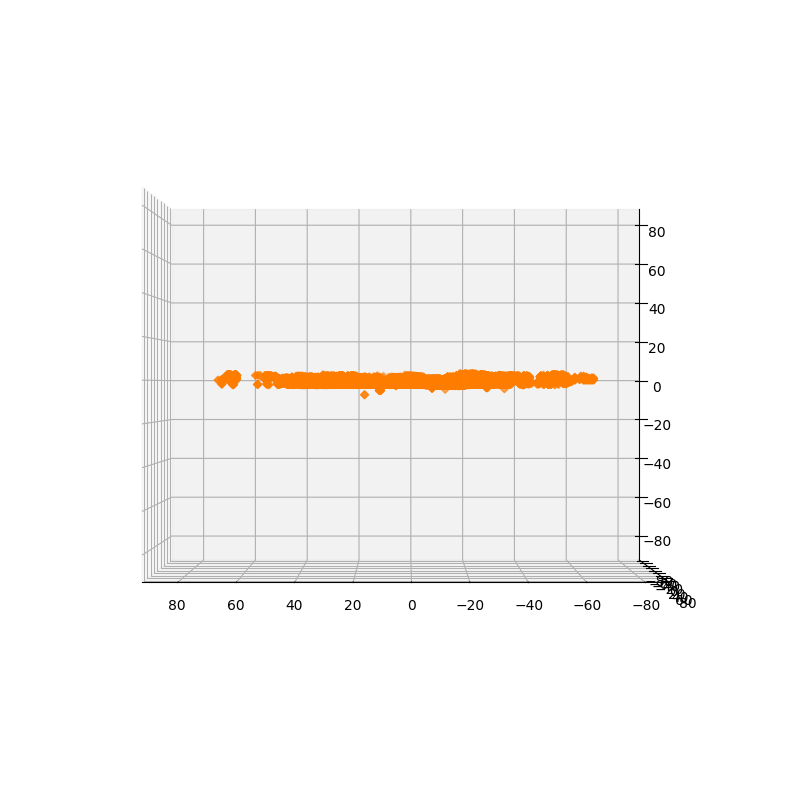

In [8]:
import open3d as o3d
import pandas as pd
from pyntcloud import PyntCloud

# 确保 `downsampled_pcd` 已生成
points_downsampled = np.asarray(downsampled_pcd.points)

# 检查点云数据
print("下采样点云总点数:", points_downsampled.shape[0])

# 转换点云为 DataFrame
df = pd.DataFrame(points_downsampled, columns=['x', 'y', 'z'])

# 使用 PyntCloud 进行可视化
cloud = PyntCloud(df)
cloud.plot()


2. Farthest Point Sampling (FPS)


实现步骤：

初始化：随机选择一个点作为第一个采样点。

迭代采样：选择当前点集中最远的点，直到达到目标点数。

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


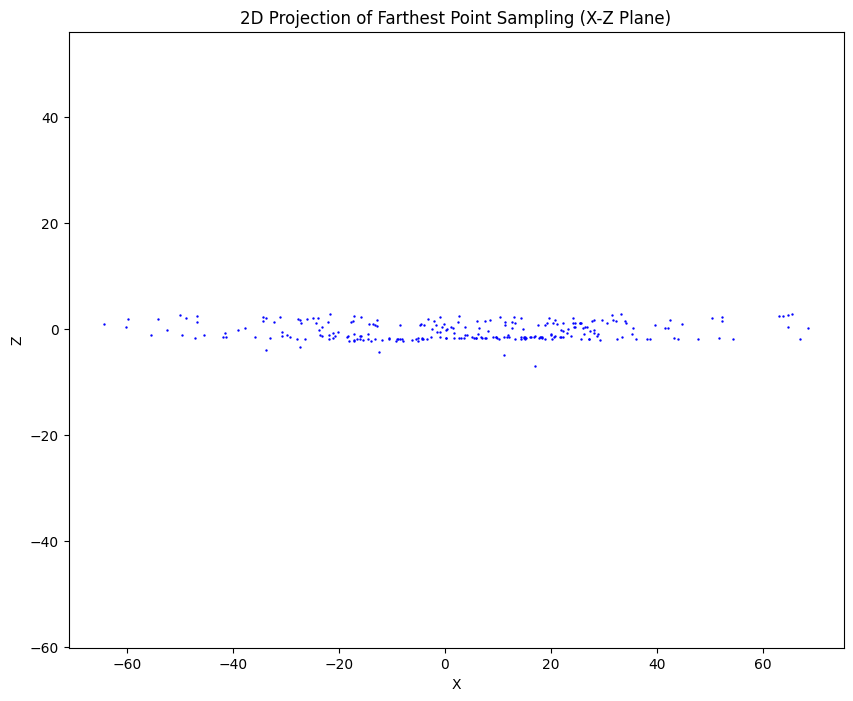

In [11]:
def farthest_point_sampling(points, num_samples):
    selected_points = [points[np.random.randint(len(points))]]
    for _ in range(num_samples - 1):
        distances = np.min([np.linalg.norm(points - p, axis=1) for p in selected_points], axis=0)
        selected_points.append(points[np.argmax(distances)])
    return np.array(selected_points)

# 使用FPS采样点
num_samples = 256
fps_points = farthest_point_sampling(points, num_samples)

# 可视化结果
fps_pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(fps_points))
o3d.visualization.draw_geometries([fps_pcd])

import matplotlib.pyplot as plt

# 将采样点云转换为 NumPy 数组
fps_points_np = np.asarray(fps_points)

# 投影到 X-Z 平面
plt.figure(figsize=(10, 8))
plt.scatter(fps_points_np[:, 0], fps_points_np[:, 2], s=0.5, c='blue')
plt.title('2D Projection of Farthest Point Sampling (X-Z Plane)')
plt.xlabel('X')
plt.ylabel('Z')
plt.axis('equal')
plt.show()

3. Normal Space Sampling

实现步骤：

估计法线：使用Open3D计算每个点的法线。

分配存储桶：根据法线分散点到多个存储桶。

存储桶采样：从每个存储桶采样一个点。

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


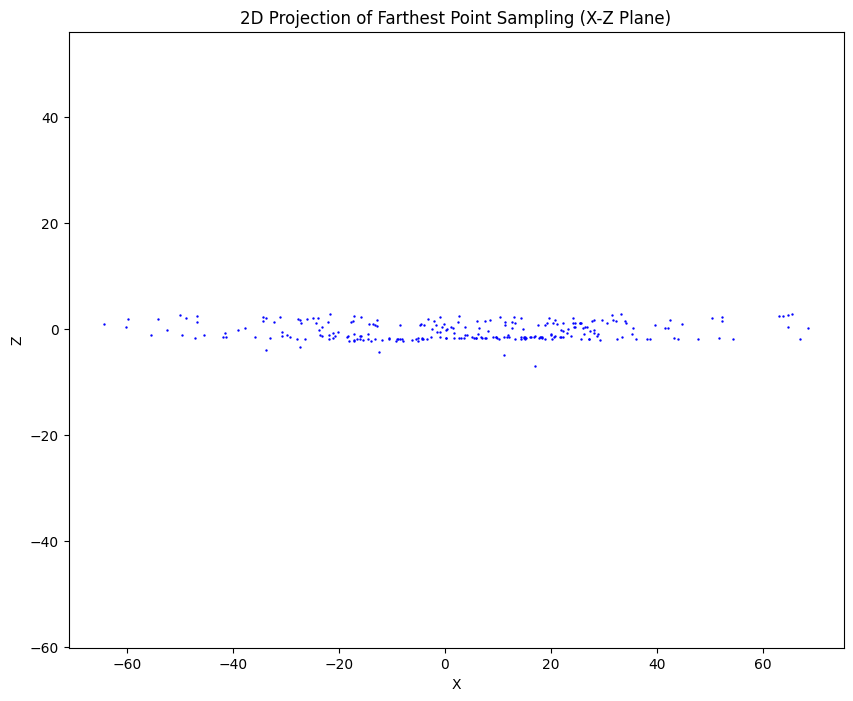

In [15]:
def normal_space_sampling(points, num_samples):
    pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
    normals = np.asarray(pcd.normals)

    # 按法线方向分桶
    buckets = {}
    for i, normal in enumerate(normals):
        bucket_key = tuple((normal // 0.1).astype(int))
        if bucket_key not in buckets:
            buckets[bucket_key] = []
        buckets[bucket_key].append(points[i])

    # 从每个桶中采样
    sampled_points = [np.mean(bucket, axis=0) for bucket in buckets.values()]
    return np.array(sampled_points[:num_samples])

# 使用Normal Space采样
num_samples = 1024
normal_space_points = normal_space_sampling(points, num_samples)

# 可视化结果
normal_space_pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(normal_space_points))
o3d.visualization.draw_geometries([normal_space_pcd])

import matplotlib.pyplot as plt

# 将采样点云转换为 NumPy 数组
fps_points_np = np.asarray(fps_points)

# 投影到 X-Z 平面
plt.figure(figsize=(10, 8))
plt.scatter(fps_points_np[:, 0], fps_points_np[:, 2], s=0.5, c='blue')
plt.title('2D Projection of Farthest Point Sampling (X-Z Plane)')
plt.xlabel('X')
plt.ylabel('Z')
plt.axis('equal')
plt.show()

4. Radius Outlier Removal

实现步骤：

定义半径：为每个点搜索局部邻域。

移除噪声：剔除邻域点数不足的点。

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


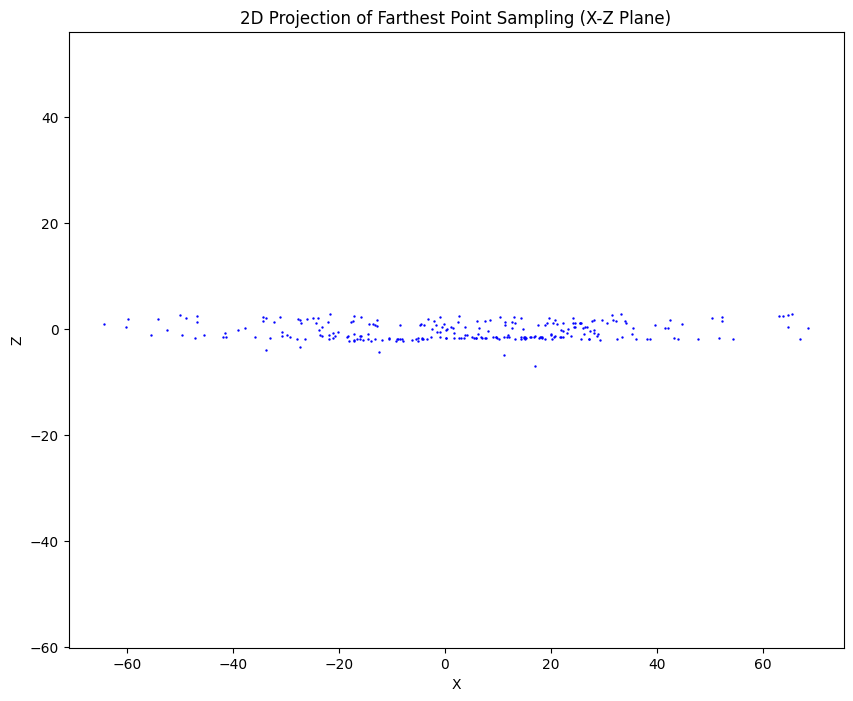

In [16]:
# 使用Open3D实现半径噪声移除
cl, ind = pcd.remove_radius_outlier(nb_points=16, radius=0.5)

# 可视化结果
filtered_pcd = pcd.select_by_index(ind)
o3d.visualization.draw_geometries([filtered_pcd])

import matplotlib.pyplot as plt

# 将采样点云转换为 NumPy 数组
fps_points_np = np.asarray(fps_points)

# 投影到 X-Z 平面
plt.figure(figsize=(10, 8))
plt.scatter(fps_points_np[:, 0], fps_points_np[:, 2], s=0.5, c='blue')
plt.title('2D Projection of Farthest Point Sampling (X-Z Plane)')
plt.xlabel('X')
plt.ylabel('Z')
plt.axis('equal')
plt.show()

5. 表面采样：从三角形网格中采样点

实现步骤：

加载3D模型网格：使用 read_off 加载 ModelNet10 网格。

计算三角形面积：根据顶点坐标计算每个三角形的面积。

随机采样：根据面积分布采样面，并从面中采样点。

In [22]:
import numpy as np
import random

def read_off(file):
    """读取 OFF 文件并返回顶点和面的数据"""
    if 'OFF' != file.readline().strip():
        print(file.name)
        raise ValueError('Not a valid OFF header')
    n_verts, n_faces, __ = tuple([int(s) for s in file.readline().strip().split(' ')])
    verts = np.array([[float(s) for s in file.readline().strip().split(' ')] for i_vert in range(n_verts)])
    faces = np.array([[int(s) for s in file.readline().strip().split(' ')][1:] for i_face in range(n_faces)])
    return verts, faces

# 替换为实际 OFF 文件路径
Path_to_off = '/content/drive/MyDrive/3d point could/ModelNet10/ModelNet10/chair/train/chair_0001.off'

# 加载顶点和面
verts, faces = None, None
with open(Path_to_off) as f_:
    verts, faces = read_off(f_)

# 计算三角形面积
def triangle_area(v1, v2, v3):
    """计算三角形面积"""
    return 0.5 * np.linalg.norm(np.cross(v2 - v1, v3 - v1))

# 使用顶点和面计算每个三角形的面积
areas = [triangle_area(verts[f[0]], verts[f[1]], verts[f[2]]) for f in faces]

# 随机采样 2048 个三角形
num_samples = 2048
sampled_faces = random.choices(faces, weights=areas, k=num_samples)

# 通过计算三角形三个顶点的均值，采样点
def sample_point_from_face(v1, v2, v3):
    """通过计算三角形三个顶点的均值，采样点"""
    return (v1 + v2 + v3) / 3

# 生成采样点
sampled_points = np.array([
    sample_point_from_face(verts[f[0]], verts[f[1]], verts[f[2]]) for f in sampled_faces
])

# 打印采样结果
print(f"生成了 {len(sampled_points)} 个采样点。")

# 可选：可视化采样点（需要安装 Open3D）
try:
    import open3d as o3d

    # 创建 Open3D 点云对象
    sampled_pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(sampled_points))

    # 保存点云为 .ply 文件
    output_path = '/content/drive/MyDrive/sampled_point_cloud.ply'
    o3d.io.write_point_cloud(output_path, sampled_pcd)
    print(f"采样点云已保存至 {output_path}")

    # 可视化点云
    o3d.visualization.draw_geometries([sampled_pcd])
except ImportError:
    print("Open3D 未安装，无法可视化点云。")


生成了 2048 个采样点。
采样点云已保存至 /content/drive/MyDrive/sampled_point_cloud.ply
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


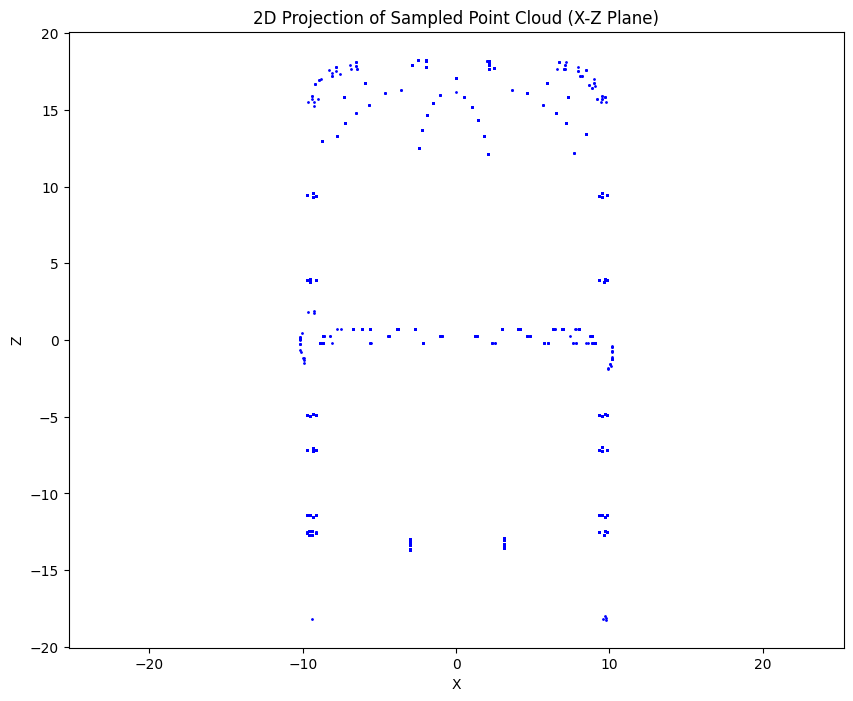

In [24]:
import matplotlib.pyplot as plt

# 转换采样点云为 NumPy 数组
sampled_points_np = np.asarray(sampled_points)

# 在 X-Z 平面投影显示
plt.figure(figsize=(10, 8))
plt.scatter(sampled_points_np[:, 0], sampled_points_np[:, 2], s=1, c='blue')
plt.title('2D Projection of Sampled Point Cloud (X-Z Plane)')
plt.xlabel('X')
plt.ylabel('Z')
plt.axis('equal')
plt.show()

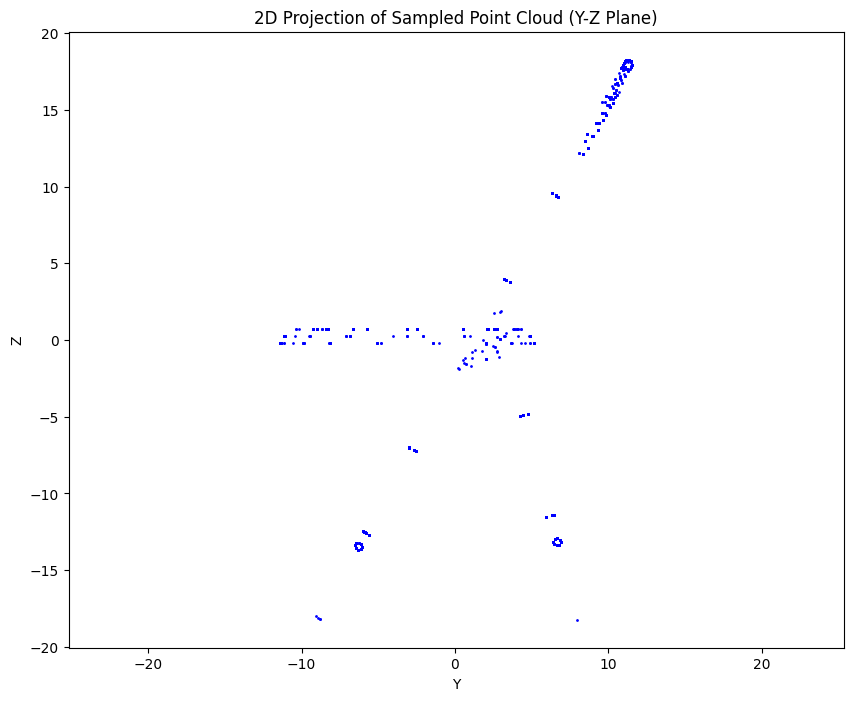

In [27]:
import matplotlib.pyplot as plt

# 转换采样点云为 NumPy 数组
sampled_points_np = np.asarray(sampled_points)

# 在 X-Z 平面投影显示
plt.figure(figsize=(10, 8))
plt.scatter(sampled_points_np[:, 1], sampled_points_np[:, 2], s=1, c='blue')
plt.title('2D Projection of Sampled Point Cloud (Y-Z Plane)')
plt.xlabel('Y')
plt.ylabel('Z')
plt.axis('equal')
plt.show()